In [2]:
# Load our usual set of packages

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Visualizations

We have seen that DataFrames are a useful way of looking at data, and using the groupby function we can in some cases reduce a complicated dataframe down to a simpler one. However with large data sets we usually find that we need to use graphical representations of the data in order to understand the whole data set at once.

Our goal this week is to explore some common tools for creating visualizations. We will not have time to go over everything, and in fact we hope to offer a STAT 202 - Data Visualization class that spends a whole semester on this topic. 

The first thing to understand is that our approach to visualizing *Numerical Data* is different from that for *Categorical Data*. Furthermore numerical data comes in *serial* and *un-serial* formats, while categorical data comes in two types *Ordered* and *Unordered*. Ordered categorical data are where the responses are not numbers, but there is an order to them:  For example the quality of the roof on a house might be classified as:  Excellent, Good, Fair, Poor, Awful. While these responses will be strings or objects in Python and Pandas; there is an order to them. Unordered categorical data is where the responses to a question do not have a natural order. For example the color of a house would be an unordered categorical data.

## Numerical Data

### Scatter Plots

Let's start with the data set about actors our book uses:

In [3]:
actors_url = 'https://drive.google.com/uc?export=download&id=1BkZuOs7u61DjhyaMn152ZbZUVhbInrwd'
actors_data = pd.read_csv(actors_url)
actors_data.head()

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
0,Harrison Ford,4871.7,41,118.8,Star Wars: The Force Awakens,936.7
1,Samuel L. Jackson,4772.8,69,69.2,The Avengers,623.4
2,Morgan Freeman,4468.3,61,73.3,The Dark Knight,534.9
3,Tom Hanks,4340.8,44,98.7,Toy Story 3,415.0
4,"Robert Downey, Jr.",3947.3,53,74.5,The Avengers,623.4


In [4]:
# Check how big this dataset is

actors_data.shape

(50, 6)

In [5]:
# Check the dtypes and make sure they are what we expect

actors_data.dtypes

Actor                 object
Total Gross          float64
Number of Movies       int64
Average per Movie    float64
#1 Movie              object
Gross                float64
dtype: object

So the primary issue we have is that we can really only visualy handle two dimensional plots, which mostly means that for numerical data we can choose two of the variables and use them as the horizontal and vertical coordinates of a plot. We can (and sometimes will) try to use color, or shape/size to represent other variables at the same time.

Seaborn has a convenient tool for trying to identify what numerical variables are interesting in a dataframe.

(also before we go much futher, the [Seaborn help manual](https://seaborn.pydata.org/introduction.html) I particularly use the Gallery frequently).

Also before we get started, this quote from the seaborn website is worth reading:  
> There is no universally best way to visualize data. Different questions are best answered by different plots. Seaborn makes it easy to switch between different visual representations by using a consistent dataset-oriented API.

In particular it is easy to make asthetic adjustments to your graphs in ways that can then be consistently applied to all of the images used in a project.

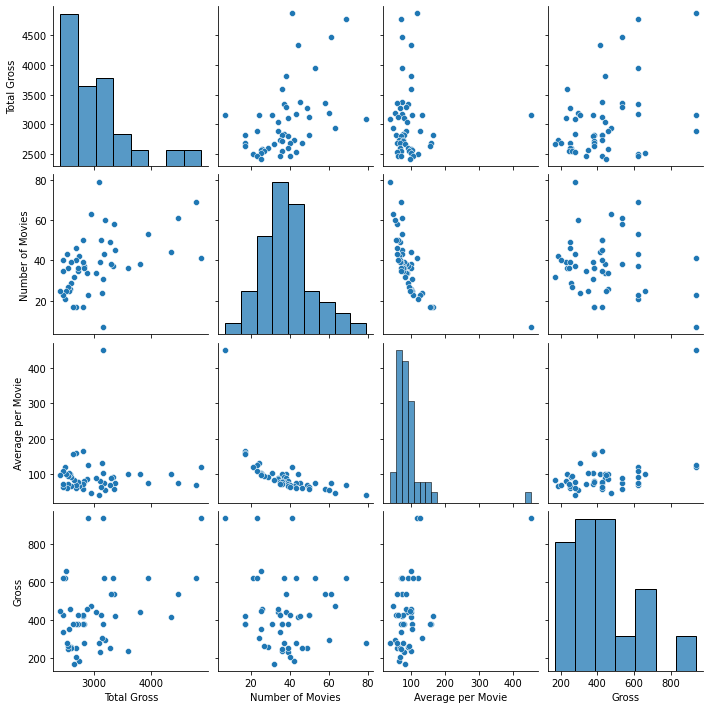

In [6]:
# Let's start with an overview of the numerical variables in the dataset

sns.pairplot(data=actors_data );

Pairplot gives us **scatter plots** for all of the pairs of numerical data in the DataFrame. What we are looking for depends on the questions we want to answer. What stands out to you?

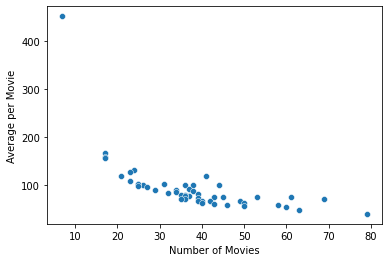

In [7]:
# Look at a single scatter plot

sns.scatterplot(data=actors_data, x='Number of Movies', y='Average per Movie');

Okay. So who is the actor off by themselves with very few movies, but a very high average gross of box office receipts (i.e. movies that sold a lot of tickets)?

In [8]:
actors_data.loc[actors_data.loc[:, 'Number of Movies']<10]

,Actor,Total Gross,Number of Movies,Average per Movie,#1 Movie,Gross
14,Anthony Daniels,3162.9,7,451.8,Star Wars: The Force Awakens,936.7


Who is Anthony Daniels?  Well it turns out he is someone whose only roles are in the Star Wars series, and he has been in nearly all of them*. (I actually want to say all of them, I think our dataset may be somewhat out of date).

### Outliers

So let's redo the plot but without this outlier. However first an interlude.

We need to be very careful about dropping outliers from our dataset without thinking about what we are doing. For this dataset about actors, the consequences of removing an actor and drawing a mistaken conclusion are relatively low. However:  [Be careful removing outliers](https://fivethirtyeight.com/features/what-went-wrong-in-flint-water-crisis-michigan/)

In 2014 the City of Flint, MI was conducting an EPA mandated periodic test of the water quality in the city. This involved testers collecting water samples from inside a random sample of houses. There were problems with the sampling methadology, the testers were not properly trained or supervised. Some of them did not run the faucet for the required time before collecting the samples, others collected the samples only from one faucet and not multiple faucets in the house.

When the city analyzed the data, to their dismay they discovered that more than 10% of the samples collected had an actionable level of lead (more than 15 parts per billion). The data analysts looked at the results and realized that if they removed two of the outliers with very high lead readings, justifying it with their knowledge that testing procedures were possibly not followed leading to a highere reading, then the percentage of samples at the actionable level would be less than 10%.

Why is 10% important to the city water company?  Well if more than 10% of the samples are above the actionable level, they are required by law to notify their customers that the city water may be contaminated with lead. At less than 10%of the samples being high, they did not need to notify anyone. 

**Three years later** a group of pediatricians in the city would come to the umistakable conclusion that the city water supply was contaiminated with lead. Lead poisoning is particularly insiduous because it causes damage to DNA that is then passed on to cause diseases in peoples offspring. 

We can remove outliers from datasets. However we need to do it with an awareness of (a) first and foremost what are the consequences if we make the wrong conclusion and (b) realizing that some problems will naturually have outliers and that they are true results not always evidence of errors in the samples. 


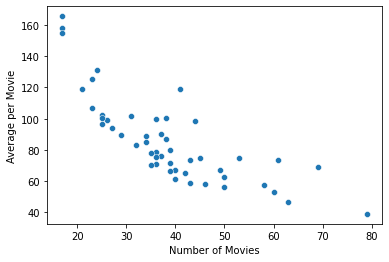

In [9]:
# Look at a single scatter plot

sns.scatterplot(data=actors_data.drop(14), x='Number of Movies', y='Average per Movie');

It appears there is a negative association between the number of movies an actor is in, and the average gross box office receipt for those movies. Why might this be? What else would you like to know?

### Line Graphs

Line graphs are commonly used for data that is *chronological* or *time series*. The classic example of time series data is studying how the price of a commodity or stock evolves over time. Consider this dataset of the price of regular gasoline and diesel in the US over time.

In [10]:
gas_url = 'https://drive.google.com/uc?export=download&id=17CZVxZb_UwxpoOcGADfkdNzdIe8p1ngF'
gas_data = pd.read_csv(gas_url)
gas_data

,Week of,U.S. No 2 Diesel Retail Prices $/gal,U.S. Regular All Formulations Retail Gasoline Prices $/gal
0,09/07/2020,2.435,2.211
1,08/31/2020,2.441,2.222
2,08/24/2020,2.426,2.182
3,08/17/2020,2.427,2.166
4,08/10/2020,2.428,2.166
...,...,...,...
1564,09/17/1990,NaN,1.266
1565,09/10/1990,NaN,1.252
1566,09/03/1990,NaN,1.242
1567,08/27/1990,NaN,1.245


In [11]:
# Okay so small problem here. We have the dates but you might notice that they are not numerical

gas_data.dtypes

Week of                                                        object
U.S. No 2 Diesel Retail Prices $/gal                          float64
U.S. Regular All Formulations Retail Gasoline Prices $/gal    float64
dtype: object

Python actually gives us some convenient tools for working with dates, and I'd like to use them here to show you how it sort of looks. 

First we are going to go through the 'Week of' columns and convert it to a Python date value. This is also going to be our first example of a Python function written by us.

In [12]:
from datetime import date


# Define a function read_date that takes a string of the form 'mm/dd/yyyy' or 'm/d/yyyy' and converts it to a 
# date(yyyy, mm, dd) object.

def read_date(str):
    
    month = int(str[:str.find('/')])   # Note you did exactly this construction on Friday
    year = int(str[-4:])   # The year is always the last 4 digits
    str2 = str[str.find('/')+1:]
    day = int(str2[:str2.find('/')] ) # Finallly we get the day by peeling off the month and then looking for the next '/'
    
    # Note the advantage of doing it this way is we did not need to assume that month or day were two digits
    # in the string. 
    
    return date(year, month, day)

    # Every Python function starts with a def function_name(arguments):
    
    # Has its commands one tab in from the def
    
    # Ends when it reaches a return and returns whatever object is put there.

In [13]:
# Let's make sure it works:

read_date('9/14/2020')

datetime.date(2020, 9, 14)

In [14]:
gas_data.loc[:, 'Week of'] = [read_date(x) for x in gas_data.loc[:, 'Week of']]

In [15]:
gas_data

,Week of,U.S. No 2 Diesel Retail Prices $/gal,U.S. Regular All Formulations Retail Gasoline Prices $/gal
0,2020-09-07,2.435,2.211
1,2020-08-31,2.441,2.222
2,2020-08-24,2.426,2.182
3,2020-08-17,2.427,2.166
4,2020-08-10,2.428,2.166
...,...,...,...
1564,1990-09-17,NaN,1.266
1565,1990-09-10,NaN,1.252
1566,1990-09-03,NaN,1.242
1567,1990-08-27,NaN,1.245


Once we have the date in this standard Python format, Seaborn knows how to handle it. (Which is just awesome as converting these dates to a number, plotting it, and then changing the labels on the plot back to dates is a pain).

<AxesSubplot:xlabel='Week of', ylabel='U.S. Regular All Formulations Retail Gasoline Prices $/gal'>

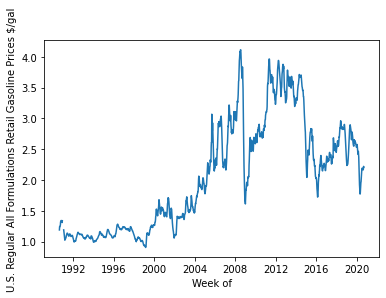

In [16]:
sns.lineplot(x='Week of', y='U.S. Regular All Formulations Retail Gasoline Prices $/gal', data=gas_data)

### Multiple Line Plots

Suppose we want to plot both columns at once and use a color to identify them.

What we need to do is create a new data frame with a column that is the date, a column that is the price, and a third column that specifies what type of fuel.

In [17]:
fuel_gas_data = pd.DataFrame([gas_data.iloc[:, 0], gas_data.iloc[:, 2]], index = ['date', 'price']).transpose()
# Note the transpose. For some reason Pandas defaults to rows when doing this.

fuel_gas_data.loc[:, 'type'] = 'gasoline'
# Set the type to be 'gasoline'

fuel_gas_data

,date,price,type
0,2020-09-07,2.211,gasoline
1,2020-08-31,2.222,gasoline
2,2020-08-24,2.182,gasoline
3,2020-08-17,2.166,gasoline
4,2020-08-10,2.166,gasoline
...,...,...,...
1564,1990-09-17,1.266,gasoline
1565,1990-09-10,1.252,gasoline
1566,1990-09-03,1.242,gasoline
1567,1990-08-27,1.245,gasoline


In [18]:
# Now do the same for diesel (column 1 rather than 2) note it is going to be important that we use the same
# names for the columns in this DataFrame

fuel_diesel_data = pd.DataFrame([gas_data.iloc[:, 0], gas_data.iloc[:, 1]], index = ['date', 'price']).transpose()

fuel_diesel_data.loc[:, 'type'] = 'diesel'

In [19]:
# Now combine the two dataframes into one with pandas.concat

fuel_data = pd.concat([fuel_gas_data, fuel_diesel_data], axis = 0)

# The dtype of 'price' needs to be reset (more or less the problem is the .transpose() I had to use above. 
# Python casts the dtype by column not by row).

fuel_data.loc[:, 'price'] = fuel_data.loc[:, 'price'].astype('float64')


fuel_data

,date,price,type
0,2020-09-07,2.211,gasoline
1,2020-08-31,2.222,gasoline
2,2020-08-24,2.182,gasoline
3,2020-08-17,2.166,gasoline
4,2020-08-10,2.166,gasoline
...,...,...,...
1564,1990-09-17,NaN,diesel
1565,1990-09-10,NaN,diesel
1566,1990-09-03,NaN,diesel
1567,1990-08-27,NaN,diesel


<AxesSubplot:xlabel='date', ylabel='price'>

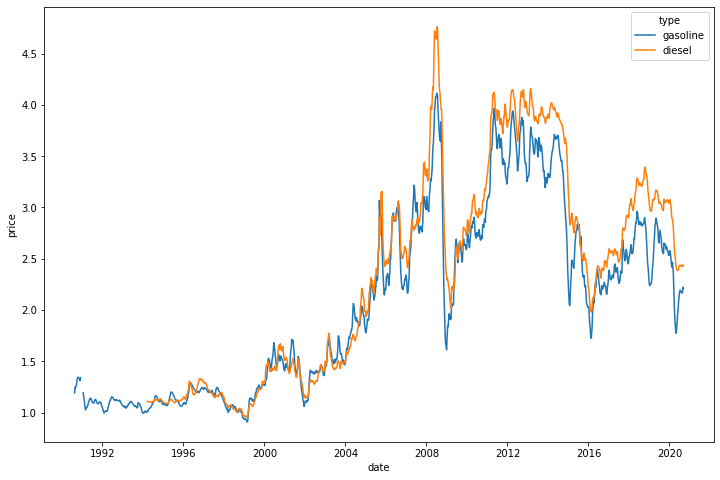

In [20]:
# Now send it to seaborn lineplot again, but now with a hue

plt.figure(figsize = (12, 8))
sns.lineplot(x='date', y='price', hue='type', data=fuel_data)

That's really neat. 

What if we just want the plot since January, 2016?  What could we do?

So one of the punchlines here is that you need the x, y, hue, and shape variables to all be single columns from your dataframe. But you need to be ready to manipulate your initial dataframe into one that is set up to produce the graph you have in mind.

## Categorical Data


Consider the dataset of the top grossing US movies of all time (from our textbook).

In [21]:
top_url = 'https://drive.google.com/uc?export=download&id=116jGAaBaAneK-jt4jLSe7iAwo9DeBrbn'
top_data = pd.read_csv(top_url)
top_data

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
...,...,...,...,...,...
195,The Caine Mutiny,Columbia,21750000,386173500,1954
196,The Bells of St. Mary's,RKO,21333333,545882400,1945
197,Duel in the Sun,Selz.,20408163,443877500,1946
198,Sergeant York,Warner Bros.,16361885,418671800,1941


Note that the 'title' and 'Studio' factors are categorical variables. In particular it does not really make a lot of sense to try and use them as the positions on an axis. Note that the 'Year' answer while being a number, has more in common with a cateagorical variables -- There are a limited number of answers and each one is used multiple times.

The Disney subsidiary Buena Vista appears frequently as does the Fox studio. Let's compare how frequently using .groupby() and .count().

In [22]:
# First we drop the numerical variables

top2_data = top_data.loc[:, ['Title', 'Studio']]
top2_data

,Title,Studio
0,Star Wars: The Force Awakens,Buena Vista (Disney)
1,Avatar,Fox
2,Titanic,Paramount
3,Jurassic World,Universal
4,Marvel's The Avengers,Buena Vista (Disney)
...,...,...
195,The Caine Mutiny,Columbia
196,The Bells of St. Mary's,RKO
197,Duel in the Sun,Selz.
198,Sergeant York,Warner Bros.


Question:  What are two more methods of producing top2_data we could have used?

In [23]:
# now let's use groupby to get the studio frequencies

movies_count = top2_data.groupby(['Studio']).count()
movies_count

,Title
Studio,
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7


Note that this produces a number in the Title column. It probably makes more sense to rename that columns. It also has used the first column, the name of the studio, as the index. For Seaborn to work with this we are going to need to turn that back into a column. Let's do both those things next.

In [24]:
# We can rename the columns by setting dataframe.columns equal to a list of the new names -- order matters!
movies_count.columns = ['count']

# .groupby('Studio') uses the 'Studio' factor as the index in the dataframe it produces. to change this back into a 
# factor we can use reset_index() notice what changes.
movies_count = movies_count.reset_index()
movies_count.head()

,Studio,count
0,AVCO,1
1,Buena Vista (Disney),29
2,Columbia,10
3,Disney,11
4,Dreamworks,3


We then can use Seaborn's barplot to plot the data. Let's start by seeing what we get out of the box.

<AxesSubplot:xlabel='count', ylabel='Studio'>

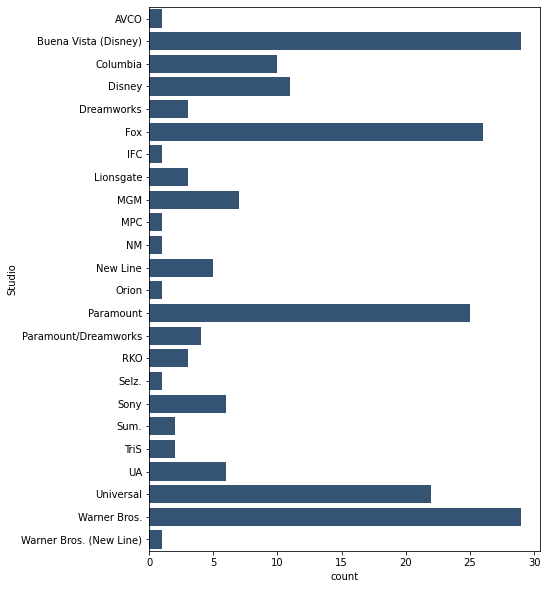

In [25]:
# Seaborn barplot then plots these. 

plt.figure(figsize=(7, 10))
sns.barplot(x='count', y='Studio', data=movies_count, color='#2B547E')

#### Color

This is the first plot where the default colors from seaborn are not a great choice (try it without the color parameter and see). 

You can specifcy colors in a number of ways, but the way I find most useful is to use the HTML color codes. [Here is a website where you can look those up](http://computerhope.com/htmcolor.htm).

A couple of notes. Normally I like my barplots to be vertical not horizontal like above. However,

- if the number of features is large
- or the names of the features are long

A vertical orientation is better because the graph we get is more readable.

Note what went wrong though.

<AxesSubplot:xlabel='count', ylabel='Studio'>

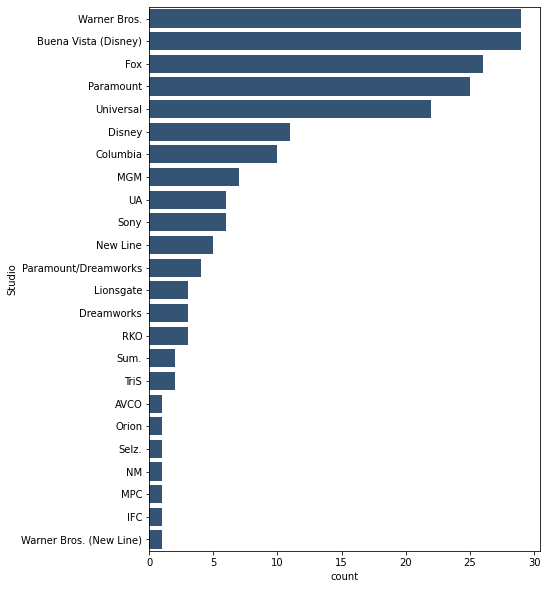

In [26]:
# It might make more sense to sort the data first.

plt.figure(figsize=(7, 10))
sns.barplot(x='count', y='Studio', data=movies_count.sort_values('count', ascending=False), color='#2B547E')

## Ordinal Categorical Data 

Some categorical data, like the 'year' in the top_data dataframe has a natural order to it. In this case it is obviously the year the movie was released. 

In [27]:
# Pull in the columns we want to use from the original dataframe, groupby the year, and then count the titles.
movies_by_year = top_data.loc[:, ['Title', 'Year']].groupby('Year').count()

# Change the 'Title' column to be 'count'
movies_by_year.columns = ['count']

# Reindex so that the 'Year' is again a feature
movies_by_year = movies_by_year.reset_index()

movies_by_year.tail()

,Year,count
65,2011,2
66,2012,5
67,2013,4
68,2014,3
69,2015,6


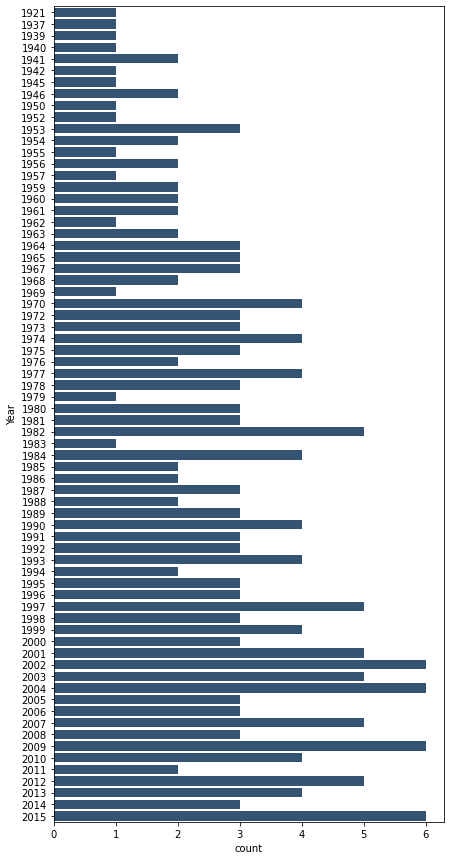

In [28]:
# Plot it. Note that I had to pass the orient parameter 'h'.  Try it without that and see what we get.

plt.figure(figsize=(7, 15))
sns.barplot(x='count', y='Year', data=movies_by_year, color='#2B547E', orient='h');

#### Things to watch out for

Seaborn is not going to give you a warning if the years were read as 'objects' for some reason. If the dtype of that column is 'object' then they will be displayed by seaborn in the order they appear in the dataframe (like the first example) which is probably not waht you want.

You might have to do some data cleaning of the original dataframe so you can change the dtype of 'Year' to int64. 


## Distributions

A very common task is to count numerical data by the frequency with which it appears within close ranges. What we are trying to do in these case is get a sense about the distribution of the response. You can see the type of plot we want to make in the sns.pairplot() example above on the diagonal values.


In [29]:
# pair down our datafram to just one of the numerical features
adj_gross = top_data.iloc[:, -2]

# First let me introduce you to the .describe() function. This gives us some information about the
# distribution of our data. 
adj_gross.describe()

count    2.000000e+02
mean     5.041983e+08
std      2.159814e+08
min      3.222619e+08
25%      3.677804e+08
50%      4.388570e+08
75%      5.512131e+08
max      1.757788e+09
Name: Gross (Adjusted), dtype: float64

In [30]:
# One thing we notice is that our data is made up of some consistently large numbers. Let's pair it down
# to a more reasonable size by scaling it by 1e+06 (or $1,000,000 of dollars)

adj_gross = adj_gross/1e+06
adj_gross.name = 'Gross (Adjusted) Millions'
adj_gross.describe()

count     200.000000
mean      504.198277
std       215.981430
min       322.261900
25%       367.780375
50%       438.857000
75%       551.213100
max      1757.788200
Name: Gross (Adjusted) Millions, dtype: float64

/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


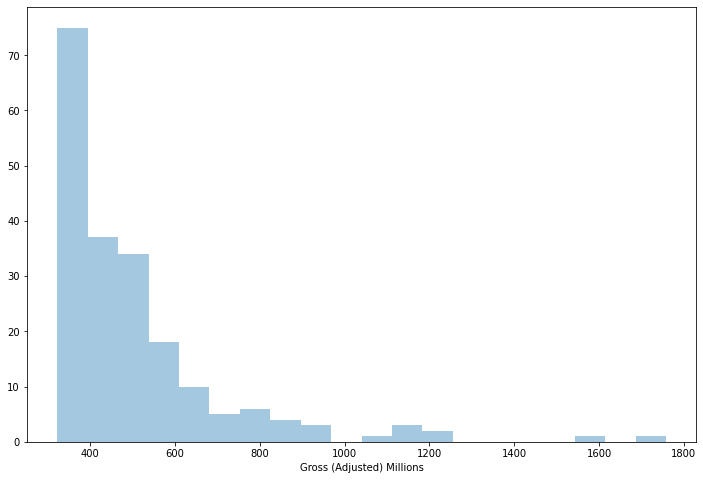

In [32]:
# Seaborns histogram. Note that Pandas also has a historgram plot, but it will not fit the pattern of seaborn.

plt.figure(figsize=(12, 8))
sns.distplot(adj_gross, bins=20, kde=False);

A note here that you may have to update this code depending on the version of Seaborn you are running.

## How to get your figures out of Python?

So you have produced a beautiful figure illustrating some features in your data. How to you get it out so that you can use it in a document or report?

Well for one thing, you could ust the markup language here in Jupyter and write your report in Jupyter. However, usually I do not want to show code to people unless they already know the language. So instead you can use the savefig function to save the figure as a file.

While we are on the topic you can use .to_csv() to save a DataFrame you have made as a csv file (which can then be read by Excel).

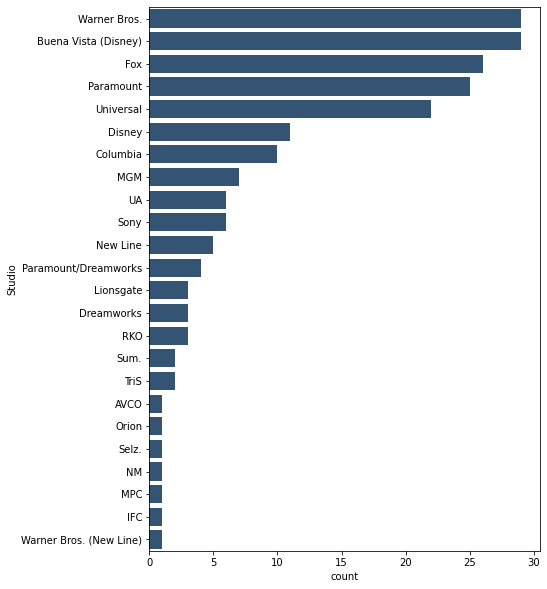

In [53]:
# It might make more sense to sort the data first.

plt.figure(figsize=(7, 10))
sns.barplot(x='count', y='Studio', data=movies_count.sort_values('count', ascending=False), color='#2B547E')
plt.savefig('studios.png')

movies_count.sort_values('count', ascending=False).to_csv('studios.csv')